In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/playground-series-s4e5/sample_submission.csv
/kaggle/input/playground-series-s4e5/train.csv
/kaggle/input/playground-series-s4e5/test.csv


In [2]:
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import Ridge, Lasso, LinearRegression, SGDRegressor
from sklearn.svm import LinearSVR
from sklearn.preprocessing import StandardScaler

from sklearn.ensemble import VotingRegressor, StackingRegressor

In [3]:
train_df = pd.read_csv("/kaggle/input/playground-series-s4e5/train.csv")
test_df = pd.read_csv("/kaggle/input/playground-series-s4e5/test.csv")

In [4]:
train_df.head()

,id,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,...,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors,FloodProbability
0,0,5,8,5,8,6,4,4,3,3,...,5,3,3,5,4,7,5,7,3,0.445
1,1,6,7,4,4,8,8,3,5,4,...,7,2,0,3,5,3,3,4,3,0.450
2,2,6,5,6,7,3,7,1,5,4,...,7,3,7,5,6,8,2,3,3,0.530
3,3,3,4,6,5,4,8,4,7,6,...,2,4,7,4,4,6,5,7,5,0.535
4,4,5,3,2,6,4,4,3,3,3,...,2,2,6,6,4,1,2,3,5,0.415


In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1117957 entries, 0 to 1117956
Data columns (total 22 columns):
 #   Column                           Non-Null Count    Dtype  
---  ------                           --------------    -----  
 0   id                               1117957 non-null  int64  
 1   MonsoonIntensity                 1117957 non-null  int64  
 2   TopographyDrainage               1117957 non-null  int64  
 3   RiverManagement                  1117957 non-null  int64  
 4   Deforestation                    1117957 non-null  int64  
 5   Urbanization                     1117957 non-null  int64  
 6   ClimateChange                    1117957 non-null  int64  
 7   DamsQuality                      1117957 non-null  int64  
 8   Siltation                        1117957 non-null  int64  
 9   AgriculturalPractices            1117957 non-null  int64  
 10  Encroachments                    1117957 non-null  int64  
 11  IneffectiveDisasterPreparedness  1117957 non-null 

In [6]:
train_df.describe()

,id,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,...,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors,FloodProbability
count,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,...,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06
mean,5.589780e+05,4.921450e+00,4.926671e+00,4.955322e+00,4.942240e+00,4.942517e+00,4.934093e+00,4.955878e+00,4.927791e+00,4.942619e+00,...,4.946893e+00,4.953999e+00,4.931376e+00,4.929032e+00,4.925907e+00,4.927520e+00,4.950859e+00,4.940587e+00,4.939004e+00,5.044803e-01
std,3.227265e+05,2.056387e+00,2.093879e+00,2.072186e+00,2.051689e+00,2.083391e+00,2.057742e+00,2.083063e+00,2.065992e+00,2.068545e+00,...,2.072333e+00,2.088899e+00,2.078287e+00,2.082395e+00,2.064813e+00,2.074176e+00,2.068696e+00,2.081123e+00,2.090350e+00,5.102610e-02
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.850000e-01
25%,2.794890e+05,3.000000e+00,3.000000e+00,4.000000e+00,4.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.000000e+00,3.000000e+00,...,4.000000e+00,3.000000e+00,3.000000e+00,3.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.000000e+00,3.000000e+00,4.700000e-01
50%,5.589780e+05,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,...,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.050000e-01
75%,8.384670e+05,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,...,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,5.400000e-01
max,1.117956e+06,1.600000e+01,1.800000e+01,1.600000e+01,1.700000e+01,1.700000e+01,1.700000e+01,1.600000e+01,1.600000e+01,1.600000e+01,...,1.700000e+01,1.700000e+01,1.600000e+01,1.600000e+01,1.700000e+01,1.800000e+01,1.900000e+01,1.600000e+01,1.600000e+01,7.250000e-01


In [7]:
train_df.isnull().sum()

id                                 0
MonsoonIntensity                   0
TopographyDrainage                 0
RiverManagement                    0
Deforestation                      0
Urbanization                       0
ClimateChange                      0
DamsQuality                        0
Siltation                          0
AgriculturalPractices              0
Encroachments                      0
IneffectiveDisasterPreparedness    0
DrainageSystems                    0
CoastalVulnerability               0
Landslides                         0
Watersheds                         0
DeterioratingInfrastructure        0
PopulationScore                    0
WetlandLoss                        0
InadequatePlanning                 0
PoliticalFactors                   0
FloodProbability                   0
dtype: int64

In [8]:
test_df.isnull().sum()

id                                 0
MonsoonIntensity                   0
TopographyDrainage                 0
RiverManagement                    0
Deforestation                      0
Urbanization                       0
ClimateChange                      0
DamsQuality                        0
Siltation                          0
AgriculturalPractices              0
Encroachments                      0
IneffectiveDisasterPreparedness    0
DrainageSystems                    0
CoastalVulnerability               0
Landslides                         0
Watersheds                         0
DeterioratingInfrastructure        0
PopulationScore                    0
WetlandLoss                        0
InadequatePlanning                 0
PoliticalFactors                   0
dtype: int64

In [ ]:
correlation_matrix = train_df.corr(numeric_only=True)
plt.figure(figsize=(20,12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

<Axes: >

All of our feature columns are relatively evenly correlated to our target (except Id of course).

In [10]:
train_df.drop('id', axis=1)

,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,Encroachments,...,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors,FloodProbability
0,5,8,5,8,6,4,4,3,3,4,...,5,3,3,5,4,7,5,7,3,0.445
1,6,7,4,4,8,8,3,5,4,6,...,7,2,0,3,5,3,3,4,3,0.450
2,6,5,6,7,3,7,1,5,4,5,...,7,3,7,5,6,8,2,3,3,0.530
3,3,4,6,5,4,8,4,7,6,8,...,2,4,7,4,4,6,5,7,5,0.535
4,5,3,2,6,4,4,3,3,3,3,...,2,2,6,6,4,1,2,3,5,0.415
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1117952,3,3,4,10,4,5,5,7,10,4,...,7,8,7,2,2,1,4,6,4,0.495
1117953,2,2,4,3,9,5,8,1,3,5,...,9,4,4,3,7,4,9,4,5,0.480
1117954,7,3,9,4,6,5,9,1,3,4,...,5,5,5,5,6,5,5,2,4,0.485
1117955,7,3,3,7,5,2,3,4,6,4,...,6,8,5,3,4,6,7,6,4,0.495


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='FloodProbability', ylabel='Count'>

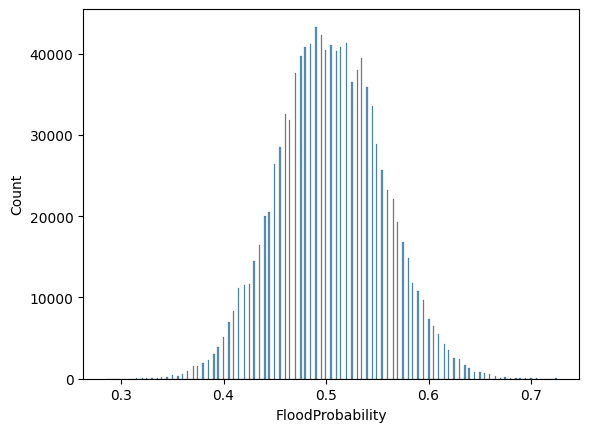

In [11]:
sns.histplot(
    train_df,
    x=train_df['FloodProbability']
)

Our target variable has a normal distribution of outcomes.

In [12]:
X = train_df.drop('FloodProbability', axis=1)
y = train_df['FloodProbability']

In [13]:
sc = StandardScaler()

In [14]:
X = sc.fit_transform(X)

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [16]:
lr = LinearRegression()

In [17]:
lr.fit(X_train, y_train)

LinearRegression()

In [18]:
y_pred_lr = lr.predict(X_test)

In [19]:
r2_score(y_test, y_pred_lr)

0.8447054900348385

In [20]:
ridge = Ridge()

In [21]:
param_grid_ridge = {
    'alpha': [0.001, 0.01, 0.1, 0.5],
    'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag']
}

In [22]:
ridge_cv = GridSearchCV(ridge, param_grid_ridge, cv=5, scoring='r2', n_jobs=-1)

In [23]:
ridge_cv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Ridge(), n_jobs=-1,
             param_grid={'alpha': [0.001, 0.01, 0.1, 0.5],
                         'solver': ['auto', 'svd', 'cholesky', 'lsqr',
                                    'sparse_cg', 'sag']},
             scoring='r2')

In [24]:
print('Best Score: ', ridge_cv.best_score_)

Best Score:  0.845021656400735


In [25]:
print('Best Parameters: ', ridge_cv.best_params_)

Best Parameters:  {'alpha': 0.5, 'solver': 'sag'}


In [26]:
lasso = Lasso()

In [27]:
param_grid_lasso = {
    'alpha': [0.001, 0.01, 0.1, 0.5]
}

In [28]:
lasso_cv = GridSearchCV(lasso, param_grid_lasso, cv=5, scoring='r2', n_jobs=-1)

In [29]:
lasso_cv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Lasso(), n_jobs=-1,
             param_grid={'alpha': [0.001, 0.01, 0.1, 0.5]}, scoring='r2')

In [30]:
print('Best Score: ', lasso_cv.best_score_)

Best Score:  0.8354488691874498


In [31]:
print('Best Parameters: ', lasso_cv.best_params_)

Best Parameters:  {'alpha': 0.001}


In [32]:
svr = LinearSVR()

In [33]:
svr.fit(X_train, y_train)

/opt/conda/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVR()

In [34]:
y_pred_svr = svr.predict(X_test)

In [35]:
r2_score(y_test, y_pred_svr)

0.794267808599957

In [36]:
sgd = SGDRegressor()

In [37]:
sgd.fit(X_train, y_train)

SGDRegressor()

In [38]:
y_pred_sgd = sgd.predict(X_test)

In [39]:
r2_score(y_test, y_pred_sgd)

0.8442294554083196

In [69]:
from catboost import CatBoostRegressor

In [74]:
cat_boost = CatBoostRegressor(verbose=1000, iterations=2000)

In [76]:
cat_boost.fit(X_train, y_train)

Learning rate set to 0.067508
0:	learn: 0.0505503	total: 145ms	remaining: 4m 50s
1000:	learn: 0.0199273	total: 1m 21s	remaining: 1m 21s
1999:	learn: 0.0197712	total: 2m 43s	remaining: 0us


In [78]:
vr = VotingRegressor([('lr', LinearRegression()),
                      ('cat', cat_boost),
                     ('ridge', ridge_cv.best_estimator_)],
                    weights=[2,3,1])

In [79]:
vr.fit(X_train, y_train)

Learning rate set to 0.067508
0:	learn: 0.0505503	total: 148ms	remaining: 4m 56s
1000:	learn: 0.0199273	total: 1m 21s	remaining: 1m 21s
1999:	learn: 0.0197712	total: 2m 44s	remaining: 0us


VotingRegressor(estimators=[('lr', LinearRegression()),
                            ('cat',
                             <catboost.core.CatBoostRegressor object at 0x7e68df2478b0>),
                            ('ridge', Ridge(alpha=0.5, solver='sag'))],
                weights=[2, 3, 1])

In [80]:
y_pred_vr = vr.predict(X_test)

In [81]:
r2_score(y_test, y_pred_vr)

0.8458306388542327

In [82]:
estimators = [
    ('lasso', lasso_cv.best_estimator_),
    ('ridge', ridge_cv.best_estimator_),
    ('sgd', sgd)
]

In [83]:
stackreg = StackingRegressor(estimators=estimators, final_estimator=vr)

In [84]:
stackreg.fit(X_train, y_train)

Learning rate set to 0.067508
0:	learn: 0.0482154	total: 95.3ms	remaining: 3m 10s
1000:	learn: 0.0187855	total: 54s	remaining: 53.9s
1999:	learn: 0.0187593	total: 1m 49s	remaining: 0us


StackingRegressor(estimators=[('lasso', Lasso(alpha=0.001)),
                              ('ridge', Ridge(alpha=0.5, solver='sag')),
                              ('sgd', SGDRegressor())],
                  final_estimator=VotingRegressor(estimators=[('lr',
                                                               LinearRegression()),
                                                              ('cat',
                                                               <catboost.core.CatBoostRegressor object at 0x7e68df2478b0>),
                                                              ('ridge',
                                                               Ridge(alpha=0.5,
                                                                     solver='sag'))],
                                                  weights=[2, 3, 1]))

In [85]:
y_pred_stack = stackreg.predict(X_test)

In [86]:
r2_score(y_test, y_pred_stack)

0.8596429233074012

In [87]:
x_test_transformed = sc.transform(test_df)

In [88]:
y_stacking = (stackreg.predict(x_test_transformed))

df_y_stacking_out = test_df[['id']]
df_y_stacking_out['FloodProbability'] = y_stacking

df_y_stacking_out.to_csv('submission.csv', index=False)

/tmp/ipykernel_33/544152204.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_y_stacking_out['FloodProbability'] = y_stacking


In [89]:
df_y_stacking_out.head()

,id,FloodProbability
0,1117957,0.574947
1,1117958,0.452067
2,1117959,0.452331
3,1117960,0.469090
4,1117961,0.467769
